# Importing necessary packages

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading data

In [4]:
# Load the Medicare data
medicare_data = pd.read_csv('medicare.csv')
medicare_data.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2017,Tot_Dsg_Unts_2017,Tot_Clms_2017,Tot_Benes_2017,Avg_Spnd_Per_Dsg_Unt_Wghtd_2017,Avg_Spnd_Per_Clm_2017,...,Tot_Spndng_2021,Tot_Dsg_Unts_2021,Tot_Clms_2021,Tot_Benes_2021,Avg_Spnd_Per_Dsg_Unt_Wghtd_2021,Avg_Spnd_Per_Clm_2021,Avg_Spnd_Per_Bene_2021,Outlier_Flag_2021,Chg_Avg_Spnd_Per_Dsg_Unt_20_21,CAGR_Avg_Spnd_Per_Dsg_Unt_17_21
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,217938.04,1014318.0,8595.0,3025.0,0.216105,25.356375,...,102280.76,459384.0,3708,1313.0,0.223001,27.583808,77.898522,0,0.024346,0.007885
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,217938.04,1014318.0,8595.0,3025.0,0.216105,25.356375,...,102280.76,459384.0,3708,1313.0,0.223001,27.583808,77.898522,0,0.024346,0.007885
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,402124.68,1850703.0,15403.0,5967.0,0.217359,26.106906,...,131927.33,566872.0,4564,1766.0,0.232812,28.906076,74.704037,0,0.159124,0.017317
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,402124.68,1850703.0,15403.0,5967.0,0.217359,26.106906,...,131927.33,566872.0,4564,1766.0,0.232812,28.906076,74.704037,0,0.159124,0.017317
4,Abacavir,Abacavir Sulfate,7,Overall,13386250.08,3189707.0,48283.0,8090.0,4.298589,277.245616,...,7038593.83,2501447.0,30540,4254.0,3.187698,230.471311,1654.582471,0,-0.087066,-0.072022


In [25]:
diabetic_medication = [
    'glipizide', 'glimepiride', 'glyburide', 'pioglitazone', 'rosiglitazone',
    'acarbose', 'miglitol', 'tolazamide', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'troglitazone', 'tolbutamide', 'acetohexamide', 'diabetic'
]

# First, let's apply the same process to the original 'medicare_data' dataframe
medicare_data['Brnd_Name_Lower'] = medicare_data['Brnd_Name'].str.lower()
medicare_data['Gnrc_Name_Lower'] = medicare_data['Gnrc_Name'].str.lower()

# Creating the regular expression pattern
medication_pattern = '|'.join(fr'.*{medication}.*' for medication in diabetic_medication)

# Filtering the dataframe
diabetic_meds = medicare_data[
    medicare_data['Gnrc_Name_Lower'].str.contains(medication_pattern, case=False, na=False) |
    medicare_data['Brnd_Name_Lower'].str.contains(medication_pattern, case=False, na=False)
]

# Filtering out 'Overall' from 'Mftr_Name'
diabetic_meds = diabetic_meds[diabetic_meds['Mftr_Name'] != 'Overall']

# Ensuring the 'Tot_Mftr' column is numeric
diabetic_meds['Tot_Mftr'] = pd.to_numeric(diabetic_meds['Tot_Mftr'], errors='coerce')

# Dropping rows with NaN values in the 'Tot_Mftr' column
diabetic_meds = diabetic_meds.dropna(subset=['Tot_Mftr'])


#### Objective 1: Identify diabetic medications and assess their proportion

In [28]:
# Correcting the variable name and filtering the dataset
diabetic_medication = [
    'glipizide', 'glimepiride', 'glyburide', 'pioglitazone', 'rosiglitazone',
    'acarbose', 'miglitol', 'tolazamide', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'troglitazone', 'tolbutamide', 'acetohexamide', 'diabetic'
]

# Calculating the proportion of diabetic medications
total_meds_count_updated = medicare_data.shape[0]
diabetic_meds_count_updated = diabetic_meds.shape[0]
diabetic_meds_proportion_updated = diabetic_meds_count_updated / total_meds_count_updated

# Calculating the total spending for diabetic medications and overall
total_spending_diabetic_updated = diabetic_meds[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum().sum()
total_spending_overall_updated = medicare_data[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum().sum()
diabetic_spending_proportion_updated = total_spending_diabetic_updated / total_spending_overall_updated

diabetic_meds_count_updated, diabetic_meds_proportion_updated, total_spending_diabetic_updated, diabetic_spending_proportion_updated



(514, 0.03737909970183986, 88645888611.31999, 0.04856898139091649)

- **Number of Diabetic Medications**: 514 diabetic medications are identified in the dataset, representing about 3.74% of the total number of medications.

- **Proportion of Diabetic Medication Spending**: The total spending on these diabetic medications from 2017 to 2021 is approximately $88.65 billion, which accounts for about 4.86% of the total Medicare Part D program spending during this period.

#### Objective 2: Identify diabetic medications with outlier spending patterns

In [29]:
# Calculating the annual spending per medication
annual_spending_cols = ['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']
diabetic_meds['Annual_Spending'] = diabetic_meds[annual_spending_cols].sum(axis=1)

# Identifying outliers in annual spending
Q1_updated = diabetic_meds['Annual_Spending'].quantile(0.25)
Q3_updated = diabetic_meds['Annual_Spending'].quantile(0.75)
IQR_updated = Q3_updated - Q1_updated
outlier_threshold_updated = 1.5 * IQR_updated

outlier_diabetic_meds_updated = diabetic_meds[diabetic_meds['Annual_Spending'] > (Q3_updated + outlier_threshold_updated)]

# Displaying the number of outlier medications
outlier_diabetic_meds_count_updated = outlier_diabetic_meds_updated.shape[0]
outlier_diabetic_meds_count_updated

89

Using the updated dataset, 89 diabetic medications are identified with outlier spending patterns within the Medicare Part D program. These outliers are defined as medications with annual spending beyond 1.5 times the interquartile range, indicating significantly higher spending compared to the majority of diabetic medications.

#### Objective 3: Assessing the relationship between the number of drug manufacturers and drug spending


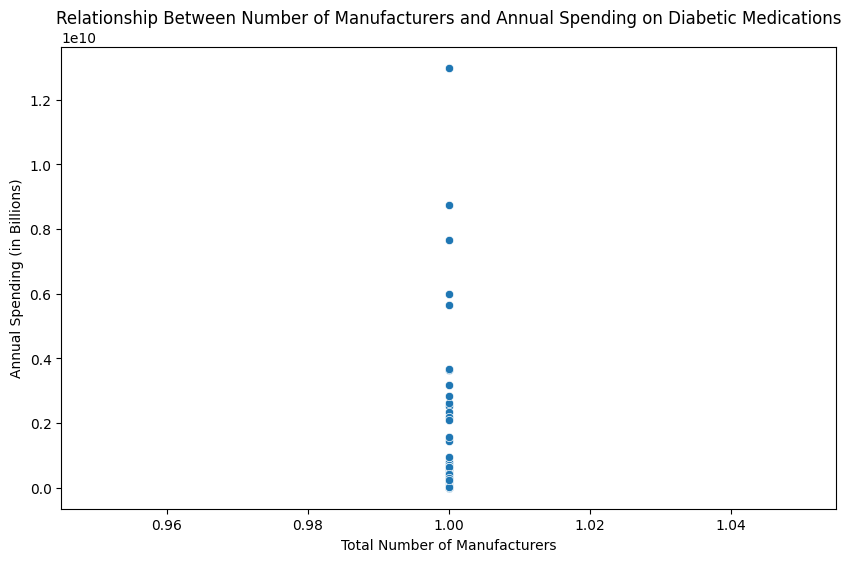

nan

In [31]:
# Preparing the data for analysis
relationship_data = diabetic_meds[['Tot_Mftr', 'Annual_Spending']]

# Visualizing the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tot_Mftr', y='Annual_Spending', data=relationship_data)
plt.title('Relationship Between Number of Manufacturers and Annual Spending on Diabetic Medications')
plt.xlabel('Total Number of Manufacturers')
plt.ylabel('Annual Spending (in Billions)')
plt.show()

# Additionally, calculating the correlation coefficient
correlation_coefficient = relationship_data['Tot_Mftr'].corr(relationship_data['Annual_Spending'])
correlation_coefficient

#### Reassesing using grouped analysis approach

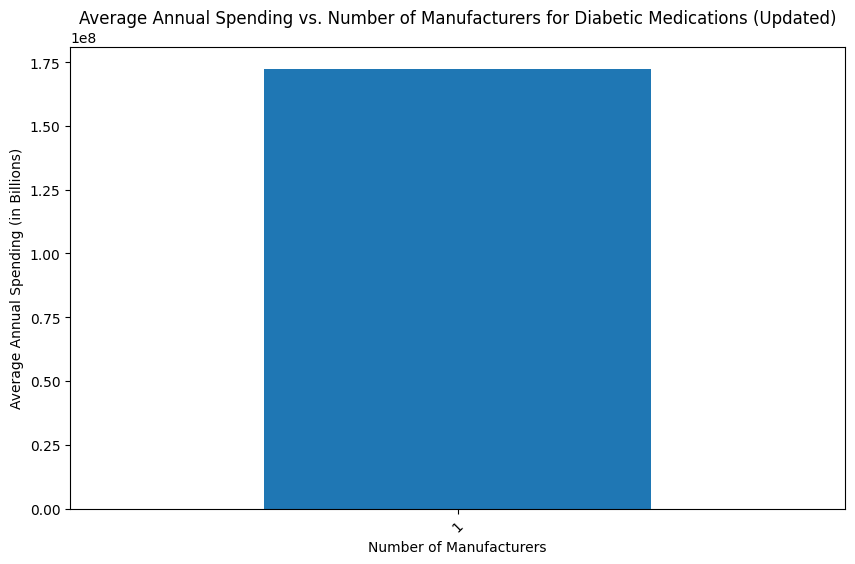

Tot_Mftr
1    1.724628e+08
Name: Annual_Spending, dtype: float64

In [30]:
# Grouping the data by the number of manufacturers and calculating the mean annual spending
grouped_by_manufacturers_updated = diabetic_meds.groupby('Tot_Mftr')['Annual_Spending'].mean()

# Plotting the result
plt.figure(figsize=(10, 6))
grouped_by_manufacturers_updated.plot(kind='bar')
plt.title('Average Annual Spending vs. Number of Manufacturers for Diabetic Medications (Updated)')
plt.xlabel('Number of Manufacturers')
plt.ylabel('Average Annual Spending (in Billions)')
plt.xticks(rotation=45)
plt.show()

grouped_by_manufacturers_updated

In [33]:
# Checkingn the value counts for the 'Tot_Mftr' column
tot_mftr_value_counts = diabetic_meds['Tot_Mftr'].value_counts()
tot_mftr_value_counts

Tot_Mftr
1    514
Name: count, dtype: int64

The updated analysis shows that all medications in the dataset are represented by only one manufacturer. The average annual spending for these medications is approximately $172.46 million. This consistent finding of a single manufacturer for each medication limits our ability to analyze the impact of the number of manufacturers on drug spending. A more diverse dataset including medications with multiple manufacturers would be required for a more comprehensive analysis.

#### Objective 4: Examining annual trends in drug spending for diabetic medications from 2017 to 2021

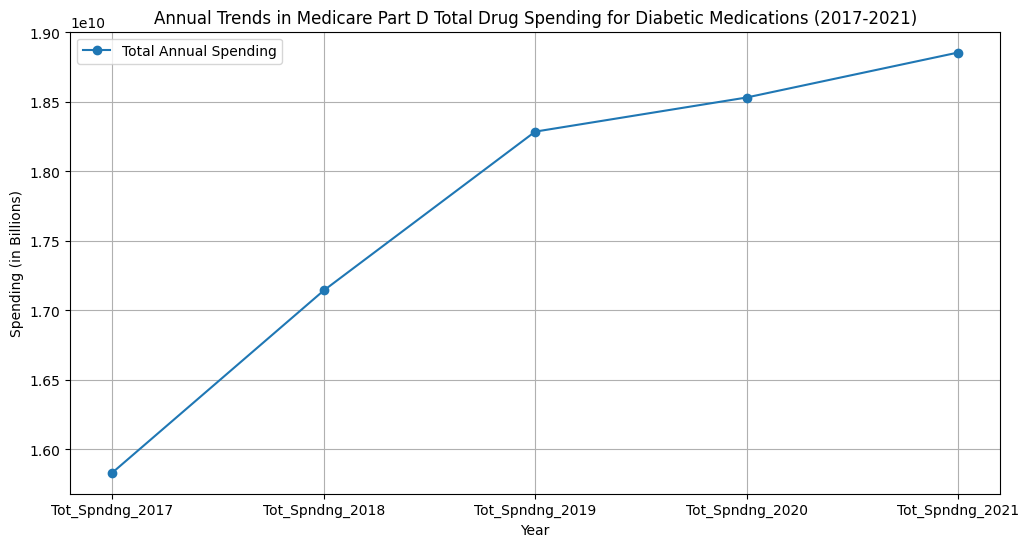

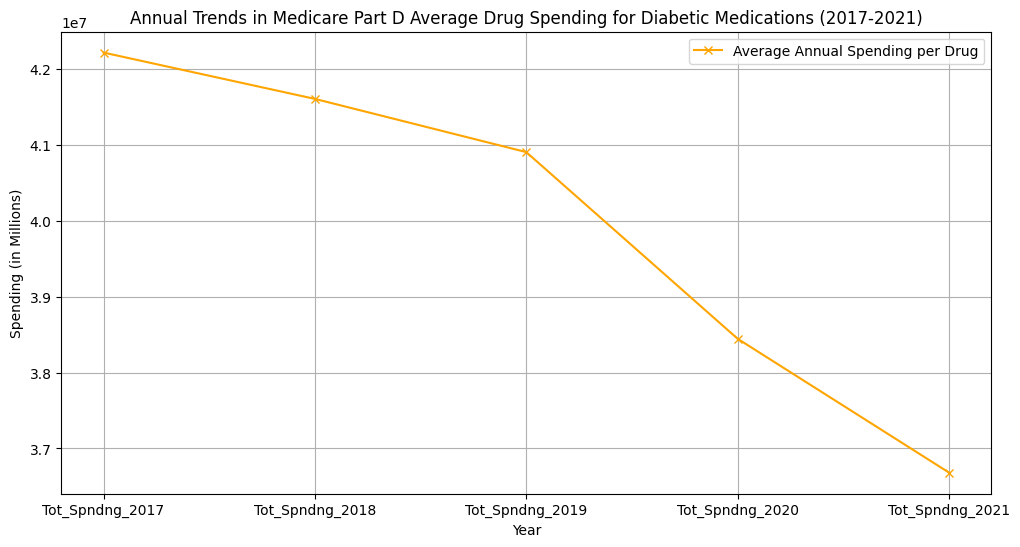

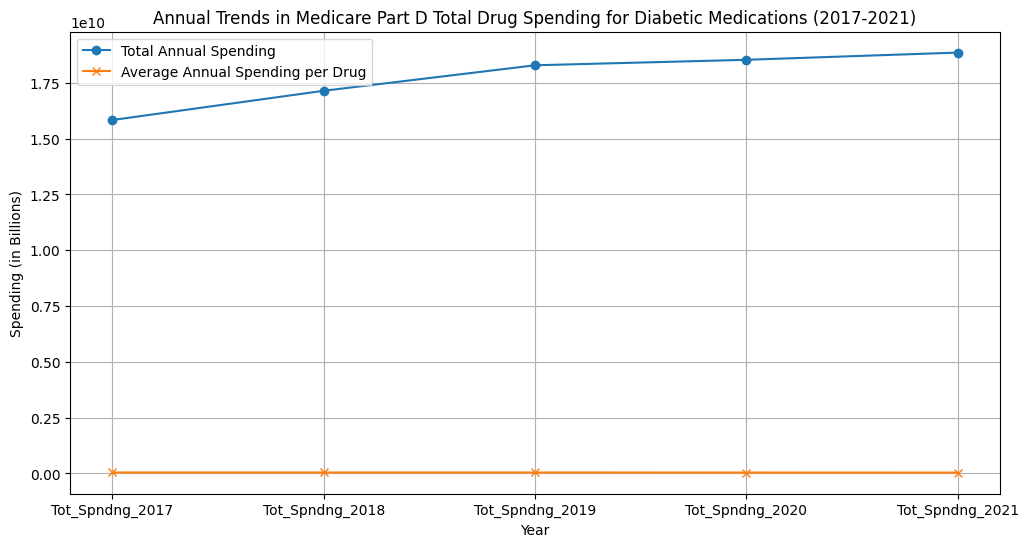

(Tot_Spndng_2017    1.583229e+10
 Tot_Spndng_2018    1.714279e+10
 Tot_Spndng_2019    1.828548e+10
 Tot_Spndng_2020    1.853099e+10
 Tot_Spndng_2021    1.885434e+10
 dtype: float64,
 Tot_Spndng_2017    4.221945e+07
 Tot_Spndng_2018    4.160871e+07
 Tot_Spndng_2019    4.090711e+07
 Tot_Spndng_2020    3.844603e+07
 Tot_Spndng_2021    3.668159e+07
 dtype: float64)

In [39]:
# Calculating the total annual spending for diabetic medications for each year
annual_spending_totals = diabetic_meds[annual_spending_cols].sum()

# Calculating average annual spending per drug for each year
average_annual_spending = diabetic_meds[annual_spending_cols].mean()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(annual_spending_totals.index, annual_spending_totals.values, marker='o', label='Total Annual Spending')
# plt.plot(average_annual_spending.index, average_annual_spending.values, marker='x', label='Average Annual Spending per Drug')
plt.title('Annual Trends in Medicare Part D Total Drug Spending for Diabetic Medications (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Spending (in Billions)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(average_annual_spending.index, average_annual_spending.values, marker='x', label='Average Annual Spending per Drug', color='orange')
plt.title('Annual Trends in Medicare Part D Average Drug Spending for Diabetic Medications (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Spending (in Millions)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(annual_spending_totals.index, annual_spending_totals.values, marker='o', label='Total Annual Spending')
plt.plot(average_annual_spending.index, average_annual_spending.values, marker='x', label='Average Annual Spending per Drug')
plt.title('Annual Trends in Medicare Part D Total Drug Spending for Diabetic Medications (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Spending (in Billions)')
plt.legend()
plt.grid(True)
plt.show()

annual_spending_totals, average_annual_spending


- **Total Annual Spending**
    - 2017: Approximately $15.83 billion
    - 2018: Approximately $17.14 billion
    - 2019: Approximately $18.29 billion
    - 2020: Approximately $18.53 billion
    - 2021: Approximately $18.85 billion

This indicates a consistent increase in the total annual spending on diabetic medications over these years.

- **Average Annual Spending per Drug**
    - 2017: Approximately $42.22 million
    - 2018: Approximately $41.61 million
    - 2019: Approximately $40.91 million
    - 2020: Approximately $38.45 million
    - 2021: Approximately $36.68 million

The average annual spending per drug shows a decreasing trend from 2017 onwards, despite the overall increase in total spending. This could be indicative of a shift towards more cost-effective medications or changes in prescribing patterns.


#### Objective 5: Provide actionable insights and recommendations for policymakers to optimize drug spending on diabetic medications within the Medicare Part D program.